In [22]:
# Standard operational package imports
import numpy as np
import pandas as pd

##################################################
###  Important imports for modeling and evaluation
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
##################################################

# Visualization package import
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
# Save the `pandas` DataFrame in variable `penguins`.
penguins = pd.read_csv("penguins.csv")
# copy created to keep original data safe
pc = penguins

In [24]:
# Review the first 10 rows.
pc.head(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,female
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,male
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN


In [25]:
# Inforamtion about the data
pc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [26]:
# Intial data description process
pc.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [27]:
# Find out how many penguin types there are.
pc['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [28]:
pc['species'].value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

In [29]:
# Check for missing values.
pc.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [30]:
# Drop rows with missing values.
pc.dropna(inplace=True)
penguins_subset = pc

In [31]:
penguins_subset.head(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,female
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,male
12,Adelie,Torgersen,41.1,17.6,182.0,3200.0,female
13,Adelie,Torgersen,38.6,21.2,191.0,3800.0,male
14,Adelie,Torgersen,34.6,21.1,198.0,4400.0,male


In [32]:
penguins_subset['sex'].unique()

array(['male', 'female'], dtype=object)

In [33]:
# Changing sex label
penguins_subset['sex'] = penguins_subset['sex'].str.upper()
penguins_subset['sex'].unique()

array(['MALE', 'FEMALE'], dtype=object)

In [34]:
# Convert `sex` column from categorical to numeric.
# replacing values
dummies = pd.get_dummies(penguins_subset.sex)
penguins_subset = pd.concat([penguins_subset, dummies], axis='columns')

In [35]:
penguins_subset.head(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,FEMALE,MALE
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE,0,1
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE,1,0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE,1,0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE,1,0
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE,0,1
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,FEMALE,1,0
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,MALE,0,1
12,Adelie,Torgersen,41.1,17.6,182.0,3200.0,FEMALE,1,0
13,Adelie,Torgersen,38.6,21.2,191.0,3800.0,MALE,0,1
14,Adelie,Torgersen,34.6,21.1,198.0,4400.0,MALE,0,1


In [36]:
# Drop the sex,island column.
penguins_subset.drop(['sex','island'], axis='columns',inplace=True)

In [37]:
# Exclude `species` variable from X
X=penguins_subset.loc[:, penguins_subset.columns != 'species']

In [38]:
#Scale the features.
#Assign the scaled data to variable `X_scaled`.
X_scaled= StandardScaler().fit_transform(X)

In [39]:
# Fit K-means and evaluate inertia for different values of k.
kmeans3 = KMeans(n_clusters=3, random_state=42)
kmeans3.fit(X_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [40]:
print('Clusters: ', kmeans3.labels_)
print('Inertia: ', kmeans3.inertia_)

Clusters:  [1 0 0 0 1 0 1 0 1 1 0 0 1 0 1 0 1 0 1 1 0 1 0 0 1 0 1 0 1 0 1 1 0 0 1 0 1
 0 1 0 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 1 0 1 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 1 0 0 1 0 1 0 1
 1 0 1 0 0 1 0 1 0 1 0 1 0 1 1 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 1 0 0 1 0
 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 1 0 1 1 0 1 0 0 1 0 1 1 0 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
Inertia:  697.7624505107124


In [41]:
# Return a list of inertia for k=2 to 10.
num_clusters = [i for i in range(2, 11)]

def kmeans_inertia(num_clusters, x_vals):
    inertia = []
    for num in num_clusters:
        kms = KMeans(n_clusters=num, random_state=42)
        kms.fit(x_vals)
        inertia.append(kms.inertia_)

    return inertia
### YOUR CODE HERE ###

In [42]:
# Assigned our data inside the function to inertia for the range of 2 to 10
inertia_range = kmeans_inertia(num_clusters,X_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

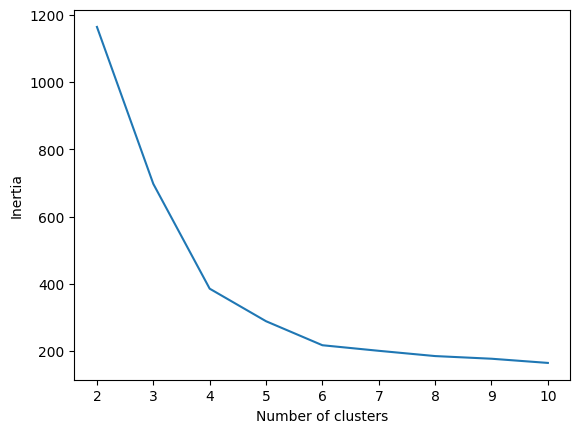

In [43]:
# Create a line plot.
plot = sns.lineplot(x=num_clusters, y=inertia_range)
plot.set_xlabel("Number of clusters");
plot.set_ylabel("Inertia");

Notice the elbow break at 4 - 5

we need to find silhouette score to further narrow down the k value

In [44]:
kmeans3_sil_score = silhouette_score(X_scaled, kmeans3.labels_)
kmeans3_sil_score

0.4778376735207607

In [45]:
# Evaluate silhouette score.
# Write a function to return a list of each k-value's score.
def kmeans_sil(num_clusters, x_vals):
    sil_score = []
    for num in num_clusters:
        kms = KMeans(n_clusters=num, random_state=42)
        kms.fit(x_vals)
        sil_score.append(silhouette_score(x_vals, kms.labels_))

    return sil_score

In [46]:
sil_range= kmeans_sil(num_clusters,X_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

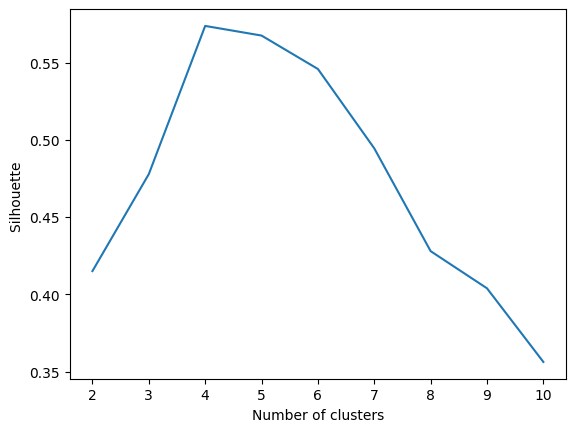

In [47]:
# Create a line plot.
plot = sns.lineplot(x=num_clusters, y=sil_range)
plot.set_xlabel("Number of clusters");
plot.set_ylabel("Silhouette ");

In [48]:
# Fit a 6-cluster model.
kmeans6 = KMeans(n_clusters=6, random_state=42)
kmeans6.fit(X_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=6, random_state=42)

In [49]:
# Print unique labels.
print('Unique labels:', np.unique(kmeans6.labels_))

Unique labels: [0 1 2 3 4 5]


In [51]:
penguins_subset['cluster'] = kmeans6.labels_

In [52]:
# Verify if any `cluster` can be differentiated by `species`.
ps_cluster_species = penguins_subset.groupby(by=['cluster', 'species']).size()

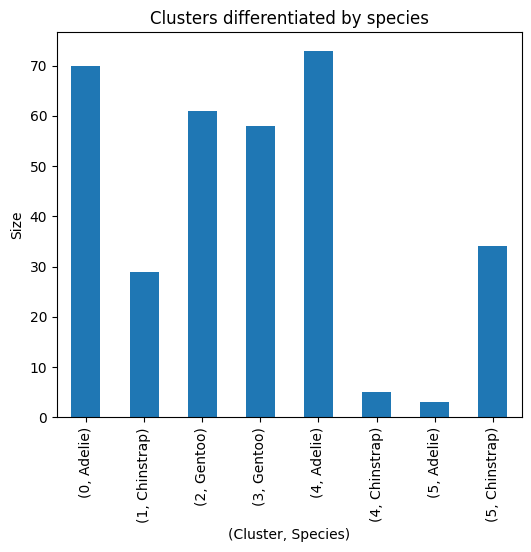

In [53]:
ps_cluster_species.plot.bar(title='Clusters differentiated by species',figsize=(6, 5),ylabel='Size',xlabel='(Cluster, Species)');

In [54]:
# Verify if each `cluster` can be differentiated by `species' AND `sex_MALE`.
penguins_subset.groupby(by=['cluster', 'MALE']).size()

cluster  MALE
0        1       70
1        0       29
2        1       61
3        0       58
4        0       78
5        1       37
dtype: int64

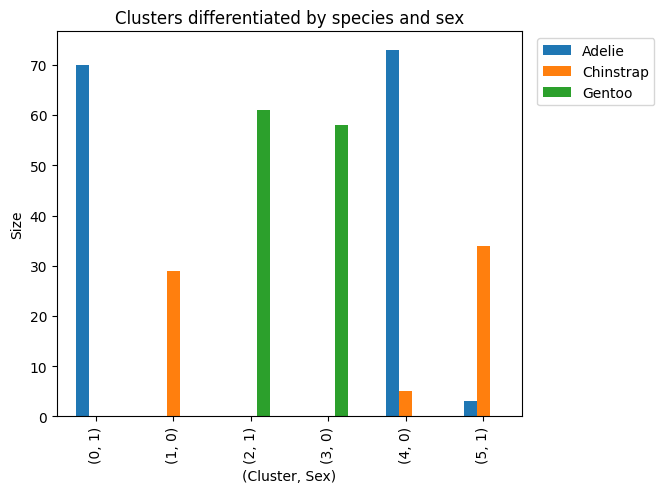

In [55]:
penguins_subset.groupby(by=['cluster','species','MALE']).size().unstack(level = 'species', fill_value=0).plot.bar(title='Clusters differentiated by species and sex',
                                                                                                                      figsize=(6, 5),
                                                                                                                      ylabel='Size',
                                                                                                                      xlabel='(Cluster, Sex)')
plt.legend(bbox_to_anchor=(1.3, 1.0))

## **Considerations**

**What are some key takeaways that you learned during this lab? Consider the process you used, key tools, and the results of your investigation.**
-   Many machine learning workflows are about cleaning, encoding, and scaling data.
-   Inertia and silhouette score can be used to find the optimal value of clusters.
-   Clusters can find natural groupings in data.
-   The clusters in this lab are mostly differentiated by species and sex as shown by the groupby results and corresponding graphs.
-   The elbow plot and especially the silhouette scores suggests that 6 clusters are optimal for this data.
-   Having 6 clusters makes sense because the study suggests that there is sexual dimorphism (differences between the sexes) for each of the three species (2 sexes * 3 different species = 6 clusters).

**What summary would you provide to stakeholders?**
*  The K-means clustering enabled this data to be effectively grouped. It helped identify patterns that can educate team members about penguins.
*  The success of the cluster results suggests that the organization can apply clustering to other projects and continue augmenting employee education.